In [1]:
import corner
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tftables
import time
from tqdm import tqdm_notebook as tqdm

import data_loader
import model_short as model
import toy_data_loader

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
np.set_printoptions(suppress=True, precision=4)

In [3]:
class hps:
    pass
hps.n_levels = 3 # number of splits
hps.depth = 3 # number of layers in revnet
hps.width = 16 # channels in revnet layers
hps.polyak_epochs = 1
hps.beta1 = .9 # learning rate annealing factor
hps.weight_decay = 1 # learning rate annealing factor
hps.lr = .001 # base learning rate
hps.n_data = 16000 # number of input spectra
hps.batch_size = 50 # number of spectra in a batch
hps.n_batches = int(hps.n_data / hps.batch_size)
hps.n_bins = 2**12

In [4]:
sess = tf.InteractiveSession()

In [5]:
# select real or toy data by uncommenting the appropriate line
# real data must have n_data=8000, n_bins=40000
#input_stream, initialize_input_stream, data_init = data_loader.create_data_loader(
input_stream, initialize_input_stream, data_init = toy_data_loader.create_data_loader(
    sess, hps.batch_size, hps.n_data, hps.n_bins
)
'''
spectra = np.load('sample_short.npz')['spectra']
sqrt = np.sqrt(spectra)

# add noise
#sums = spectra.sum(axis=1)
#sqrtsums = sqrt.sum(axis=1)
#As = .02 * sums / (np.sqrt(2 / 3.14) * sqrtsums)
#noise = np.random.normal(scale=(np.repeat(As[:, np.newaxis], hps.n_bins, axis=1) * sqrt))
#print((np.abs(noise).sum(axis=1) / spectra.sum(axis=1)))

scaled_spectra = spectra / spectra.std(axis=1)[:, np.newaxis]
#scaled_spectra = (spectra + noise) / (spectra + noise).std(axis=1)[:, np.newaxis]
centered_spectra = scaled_spectra - scaled_spectra.mean(axis=1)[:, np.newaxis]
#normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]

def create_data_loader(sess, data, batch_size):
    placeholder_data = tf.compat.v1.placeholder(tf.float32, data.shape)
    dataset = tf.data.Dataset.from_tensor_slices(placeholder_data)
    dataset = dataset.batch(batch_size)
    iterator = dataset.make_initializable_iterator()
    input_stream = iterator.get_next()
    
    def initialize_input_stream():
        sess.run(iterator.initializer, feed_dict={placeholder_data: data})
    
    initialize_input_stream()
    data_init = sess.run(input_stream)
    return input_stream, initialize_input_stream, data_init

input_stream, initialize_input_stream, data_init = create_data_loader(
    sess, centered_spectra[:, :, np.newaxis], hps.batch_size
)'''

/home/tey/glow/toy_data_loader.py:9: RuntimeWarning: overflow encountered in exp
  return 2 * h * c**2 / wavelength**5 * 1 / (np.exp(h * c / (wavelength * k * T)) - 1)
W0318 10:00:59.257380 139688523736832 deprecation.py:323] From /home/tey/glow/toy_data_loader.py:35: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


"\nspectra = np.load('sample_short.npz')['spectra']\nsqrt = np.sqrt(spectra)\n\n# add noise\n#sums = spectra.sum(axis=1)\n#sqrtsums = sqrt.sum(axis=1)\n#As = .02 * sums / (np.sqrt(2 / 3.14) * sqrtsums)\n#noise = np.random.normal(scale=(np.repeat(As[:, np.newaxis], hps.n_bins, axis=1) * sqrt))\n#print((np.abs(noise).sum(axis=1) / spectra.sum(axis=1)))\n\nscaled_spectra = spectra / spectra.std(axis=1)[:, np.newaxis]\n#scaled_spectra = (spectra + noise) / (spectra + noise).std(axis=1)[:, np.newaxis]\ncentered_spectra = scaled_spectra - scaled_spectra.mean(axis=1)[:, np.newaxis]\n#normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]\n\ndef create_data_loader(sess, data, batch_size):\n    placeholder_data = tf.compat.v1.placeholder(tf.float32, data.shape)\n    dataset = tf.data.Dataset.from_tensor_slices(placeholder_data)\n    dataset = dataset.batch(batch_size)\n    iterator = dataset.make_initializable_iterator()\n    input_stream = iterator.get_next()\n    \n    def init

(50, 4096, 1)


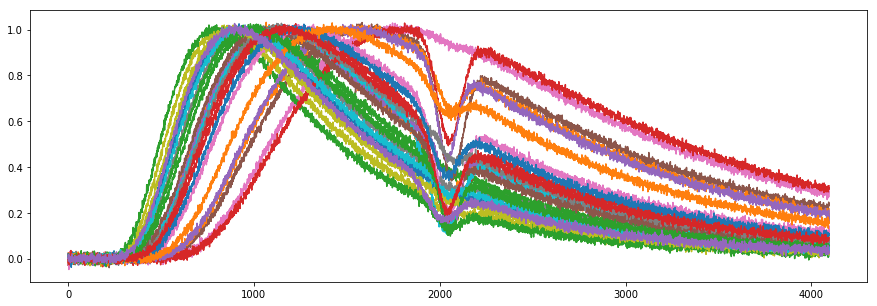

In [6]:
print(data_init.shape)
plt.figure(figsize=(15, 5))
for spectrum in data_init[:25]:
    plt.plot(spectrum)

In [7]:
with tf.device("/device:GPU:0"):
    m = model.model(sess, hps, input_stream, data_init)

W0318 10:01:00.480420 139688523736832 deprecation.py:506] From /home/tey/env/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0318 10:01:00.529661 139688523736832 deprecation_wrapper.py:119] From /home/tey/glow/tfops_short.py:102: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



Tensor("input/latent_rep:0", shape=(?, 256, 4), dtype=float32, device=/device:GPU:0)
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256


W0318 10:01:03.855273 139688523736832 deprecation.py:323] From /home/tey/env/lib/python3.5/site-packages/tensorflow/python/training/moving_averages.py:433: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256


W0318 10:01:06.227526 139688523736832 deprecation_wrapper.py:119] From /home/tey/glow/model_short.py:157: The name tf.matrix_inverse is deprecated. Please use tf.linalg.inv instead.

W0318 10:01:06.339149 139688523736832 deprecation_wrapper.py:119] From /home/tey/glow/model_short.py:184: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 256, 4) (1, 1, 4) 256
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 512, 4) (1, 1, 4) 512
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024
actnorm_scale (?, 1024, 4) (1, 1, 4) 1024


In [8]:
m.restore('models/model-200318-095826')

W0318 10:01:34.050608 139688523736832 deprecation.py:323] From /home/tey/env/lib/python3.5/site-packages/tensorflow/python/training/saver.py:1272: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [19]:
i = np.random.randint(0, hps.batch_size)
spectrum = data_init[i:i+1, :, :]
print(i)

36


In [20]:
latent_rep = m.encode(spectrum)
reconstruction = m.decode(latent_rep)
print(latent_rep.mean(), latent_rep.std())
print(reconstruction.mean(), reconstruction.std())
print(np.mean((spectrum - reconstruction)**2))

0.09811489 1.0035137
0.45338705 0.3089381
0.00019967239


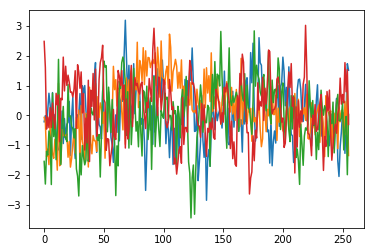

In [21]:
for channel in range(latent_rep.shape[-1]):
    plt.plot(latent_rep[0, :, channel])

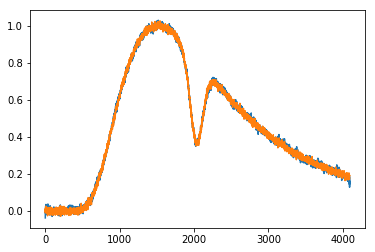

In [22]:
plt.plot(np.squeeze(reconstruction))
plt.plot(np.squeeze(spectrum))

(1843.2, 2252.8)

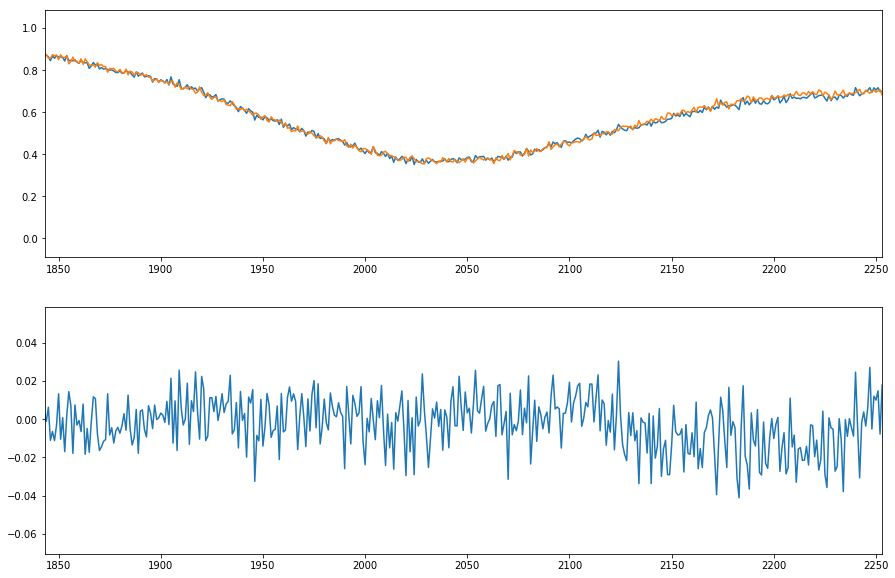

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(np.squeeze(reconstruction))
plt.plot(np.squeeze(spectrum))
#plt.xlim(12000, 14000)
plt.xlim(hps.n_bins*.45, hps.n_bins*.55)

plt.subplot(2, 1, 2)
plt.plot(np.squeeze(reconstruction) - np.squeeze(spectrum))
#plt.xlim(12000, 14000)
plt.xlim(hps.n_bins*.45, hps.n_bins*.55)

In [25]:
window = (2025, 2026) # (1850, 2200)
a = tf.reduce_mean((spectrum[:, :window[0]] - m.decoded_spectra[:, :window[0]])**2)
b = tf.reduce_mean((spectrum[:, window[0]:window[1]] - m.decoded_spectra[:, window[0]:window[1]])**2)
c = tf.reduce_mean((spectrum[:, window[1]:] - m.decoded_spectra[:, window[1]:])**2)
grad = tf.gradients(b-a-c, m.z_placeholder)

In [26]:
grads = []
latent_reps = [latent_rep]

In [92]:
for _ in range(1000):
    grads.append(sess.run(grad, {m.z_placeholder: latent_reps[-1]}))
    latent_reps.append(latent_reps[-1] + .1 * grads[-1][0])

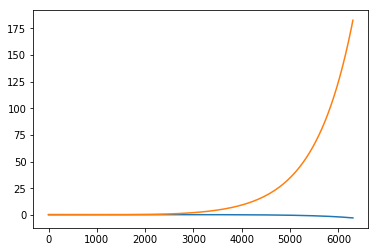

In [94]:
plt.plot(np.array(latent_reps).mean(axis=(1, 2, 3)))
plt.plot(np.array(latent_reps).std(axis=(1, 2, 3))-1)

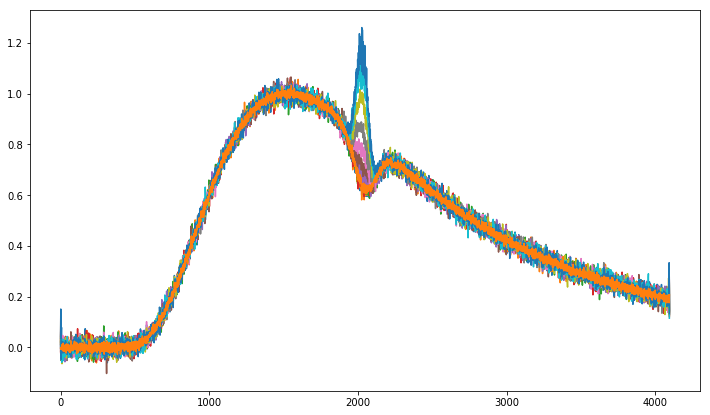

In [98]:
plt.figure(figsize=(12, 7))
plt.plot(np.squeeze(reconstruction))
#plt.plot(np.squeeze(decode_test))
for i in range(0, len(latent_reps[:1000]), 100):
    plt.plot(np.squeeze(m.decode(latent_reps[i])))
plt.plot(np.squeeze(spectrum))

(1843.2, 2252.8)

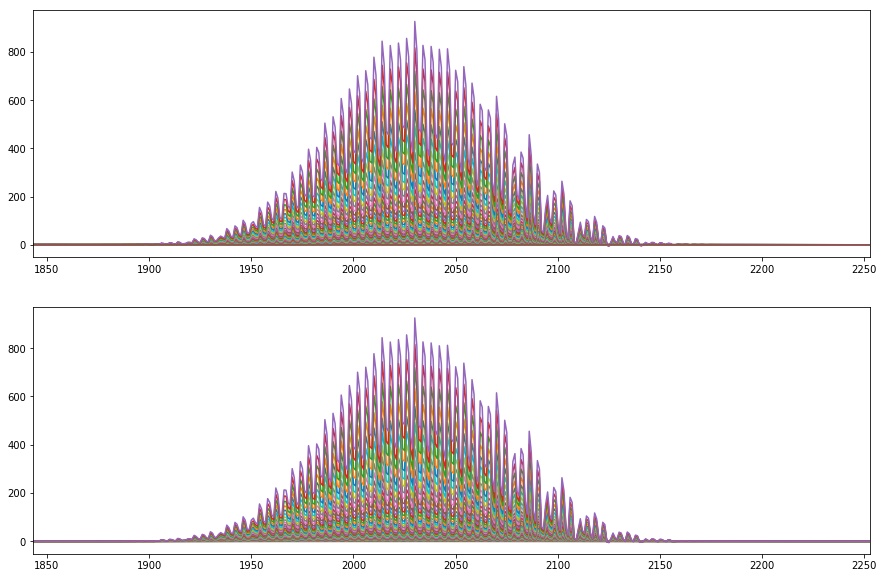

In [101]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(np.squeeze(reconstruction))
for i in range(0, len(latent_reps), 100):
    plt.plot(np.squeeze(m.decode(latent_reps[i])))
plt.plot(np.squeeze(spectrum))
#plt.xlim(12000, 14000)
plt.xlim(hps.n_bins*.45, hps.n_bins*.55)

plt.subplot(2, 1, 2)
plt.plot(np.squeeze(reconstruction) - np.squeeze(spectrum))
for i in range(0, len(latent_reps), 100):
    plt.plot(np.squeeze(m.decode(latent_reps[i]) - spectrum))

#plt.xlim(12000, 14000)
plt.xlim(hps.n_bins*.45, hps.n_bins*.55)